# Logistic Regression

## Imports and Initial Look

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
heart_attack = pd.read_csv("./data/Medicaldataset.csv")

In [3]:
heart_attack

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [4]:
heart_attack.columns

Index(['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin',
       'Result'],
      dtype='object')

In [5]:
X = heart_attack.drop(columns=['Result'])
X = sm.add_constant(X)
y = heart_attack['Result']
y = y.map({'negative': 0, 'positive':1})

In [6]:
X.corr()

,const,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,NaN,1.000000,-0.092874,-0.023440,0.017441,0.002614,-0.004193,0.018419,0.088800
Gender,NaN,-0.092874,1.000000,-0.026781,0.011065,-0.009370,0.006668,0.017527,0.065793
Heart rate,NaN,-0.023440,-0.026781,1.000000,0.010882,0.108353,-0.019584,-0.013001,0.011180
Systolic blood pressure,NaN,0.017441,0.011065,0.010882,1.000000,0.586166,0.020807,-0.016396,0.043729
Diastolic blood pressure,NaN,0.002614,-0.009370,0.108353,0.586166,1.000000,-0.025614,-0.023403,0.043360
Blood sugar,NaN,-0.004193,0.006668,-0.019584,0.020807,-0.025614,1.000000,0.045757,0.021069
CK-MB,NaN,0.018419,0.017527,-0.013001,-0.016396,-0.023403,0.045757,1.000000,-0.016008
Troponin,NaN,0.088800,0.065793,0.011180,0.043729,0.043360,0.021069,-0.016008,1.000000


In [7]:
model = sm.GLM(y, X, family=sm.families.Binomial()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Result   No. Observations:                 1319
Model:                            GLM   Df Residuals:                     1310
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -547.09
Date:                Thu, 29 May 2025   Deviance:                       1094.2
Time:                        16:30:32   Pearson chi2:                 4.50e+15
No. Iterations:                    10   Pseudo R-squ. (CS):             0.3960
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## VIF

In [8]:
vals = [VIF(X, i) for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X.columns[1:])
vif

,vif
Age,1.019626
Gender,1.016153
Heart rate,1.017915
Systolic blood pressure,1.534611
Diastolic blood pressure,1.552667
Blood sugar,1.005432
CK-MB,1.003788
Troponin,1.016946


VIF seems to be fine. In this case, since there are not many predictors, I want to try backward elimination to see if anything changes.

## Backwards Elimination

### Original

To save on space, I am going to remove all the summaries

### Iteration 1

In [9]:
X1 = X.drop(columns=['Heart rate'])
model = sm.GLM(y, X1, family=sm.families.Binomial()).fit()

### Iteration 2

In [10]:
X2 = X1.drop(columns=['Diastolic blood pressure'])
model = sm.GLM(y, X2, family=sm.families.Binomial()).fit()

### Iteration 3

In [11]:
X3 = X2.drop(columns=['Systolic blood pressure'])
model = sm.GLM(y, X3, family=sm.families.Binomial()).fit()

### Iteration 4

In [12]:
X4 = X3.drop(columns=['Blood sugar'])
model = sm.GLM(y, X4, family=sm.families.Binomial()).fit()

So the p-values did not drop all that much from backward elimination but it was worth a try

## Predictions

I will first predicted on trained data just to see the outcome

In [13]:
probs = model.predict(X4)
residuals = y - probs

In [14]:
labels = np.array([0]*1319)
labels[probs>0.5] = 1
# labels = labels.map({0: 'negative', 1: 'positive'})
labels

array([0, 1, 0, ..., 1, 1, 1])

In [15]:
pd.DataFrame(confusion_matrix(y, labels))

,0,1
0,408,101
1,149,661


In [16]:
(408+661)/1319, np.mean(labels == y)

(0.8104624715693708, 0.8104624715693708)

81% is ok.. lets try it with a train test split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=.5, random_state=0)

In [18]:
test_model = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()

In [19]:
probs = test_model.predict(X_test)

In [20]:
labels = np.array([0]*660)
labels[probs>0.5] = 1

In [21]:
pd.DataFrame(confusion_matrix(y_test, labels))

,0,1
0,206,55
1,74,325


In [22]:
(206+325)/660, np.mean(labels==y_test)

(0.8045454545454546, 0.8045454545454546)

## LDA

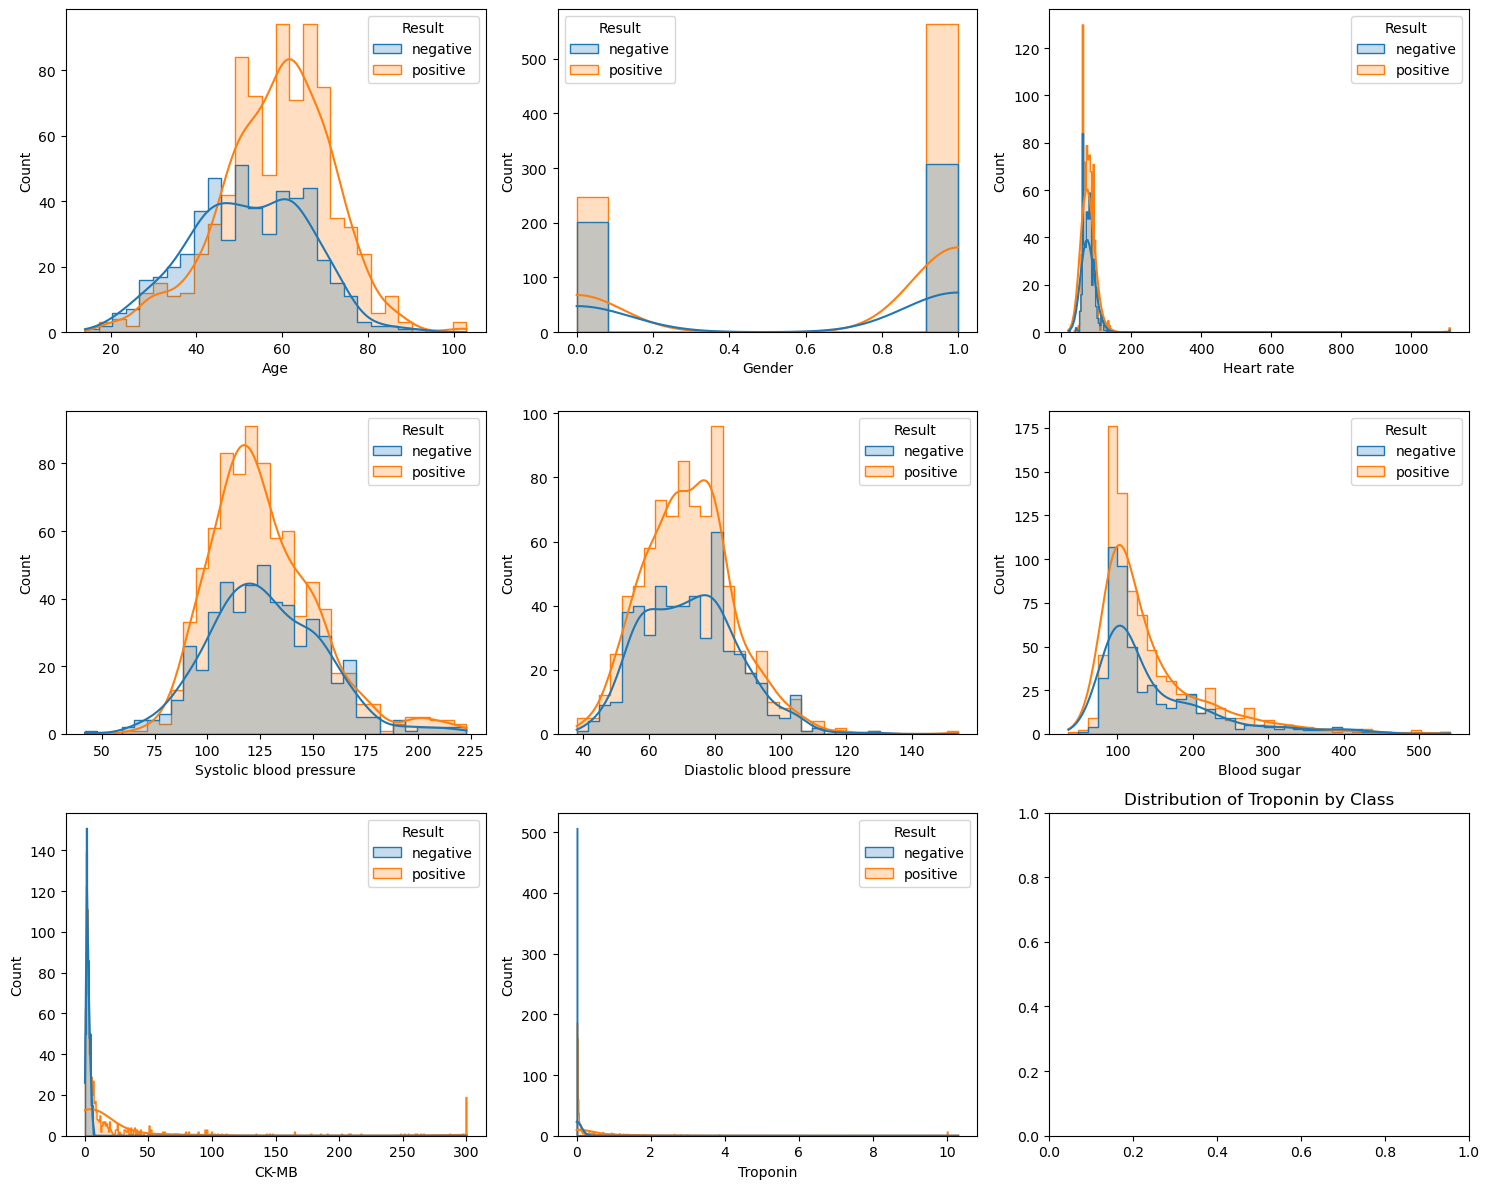

In [33]:
fig, axes = plt.subplots(3, 3, figsize=(15, 4 * n_rows))

axes = axes.flatten()

for i, col in enumerate(X.drop(columns='const').columns):
    ax = axes[i]
    sns.histplot(data=heart_attack, x=col, hue='Result', kde=True, ax=ax, element='step', stat='count')
    plt.title(f'Distribution of {col} by Class')

plt.tight_layout()
plt.show()


LDA probably wouldn't work here because of the data point are not normally distributed. These include:

- Heart rate
- Blood sugar
- CK-MB
- Troponin

In [43]:
lda = LDA(store_covariance=True)

In [44]:
X = heart_attack.drop(columns=['Result'])
y = heart_attack['Result']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

In [46]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [47]:
lda.classes_

array(['negative', 'positive'], dtype='<U8')

In [48]:
lda.priors_

array([0.37632777, 0.62367223])

In [49]:
lda.scalings_

array([[ 0.04409957],
       [ 0.58313824],
       [ 0.00284067],
       [-0.00326297],
       [ 0.00082745],
       [-0.00225025],
       [ 0.0126969 ],
       [ 0.47172541]])

In [50]:
lda_preds = lda.predict(X_test)

In [51]:
pd.DataFrame(confusion_matrix(y_test, lda_preds))

,0,1
0,116,145
1,52,347


In [52]:
np.mean(lda_preds==y_test)

0.7015151515151515

LDA seems to be doing worst than Binomial GLM. But to be fair, this is using all the predictors while the GLM is using refined predictors.

Given such, I am going to try LDA again but only with the predictors that were significant for the GLM.
- Age
- Gender
- CK-MB
- Troponin

In [54]:
X = heart_attack[['Age','Gender','CK-MB','Troponin']]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

In [57]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [59]:
new_lda_preds = lda.predict(X_test)

In [61]:
pd.DataFrame(confusion_matrix(y_test, new_lda_preds))


,0,1
0,104,157
1,48,351


In [62]:
np.mean(new_lda_preds==y_test)

0.6893939393939394

## QDA

In [72]:
X = heart_attack.drop(columns=['Result'])
y = heart_attack['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

In [73]:
qda = QDA(store_covariance=True)

In [75]:
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [78]:
qda.priors_

array([0.37632777, 0.62367223])

In [80]:
qda.covariance_[0]

array([[ 1.95296265e+02, -4.60526316e-01, -2.84439075e+01,
        -1.30869792e+01, -2.11476753e+01,  1.36205661e+02,
         1.81010513e-02,  4.67684308e-01],
       [-4.60526316e-01,  2.35323887e-01, -5.46558704e-01,
         2.44939271e-01,  1.16396761e-02,  2.93572874e+00,
         3.83405870e-02,  1.58426113e-02],
       [-2.84439075e+01, -5.46558704e-01,  1.95476557e+02,
         9.12563667e+00,  3.75528275e+01, -5.35016325e+01,
         4.92754734e-01, -3.84252841e-01],
       [-1.30869792e+01,  2.44939271e-01,  9.12563667e+00,
         7.38845240e+02,  2.56488507e+02,  1.06667298e+02,
         4.76162172e+00,  1.72342758e-01],
       [-2.11476753e+01,  1.16396761e-02,  3.75528275e+01,
         2.56488507e+02,  2.06218085e+02, -1.59661584e+01,
         9.27214461e-01, -7.14904385e-01],
       [ 1.36205661e+02,  2.93572874e+00, -5.35016325e+01,
         1.06667298e+02, -1.59661584e+01,  6.40190726e+03,
        -5.01582462e+00,  5.23455906e-01],
       [ 1.81010513e-02,  3.834058

In [81]:
qda_preds = qda.predict(X_test)

In [82]:
pd.DataFrame(confusion_matrix(y_test, qda_preds))

,0,1
0,253,8
1,224,175


In [87]:
np.mean(qda_preds==y_test)

0.6484848484848484